In [167]:
import os

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from itertools import groupby

In [168]:
df_train = pd.read_csv("./sartorius-cell-instance-segmentation/train.csv")
df_train

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
...,...,...,...,...,...,...,...,...,...
73580,ffdb3cc02eef,3610 3 4311 7 5014 9 5717 11 6420 13 7123 15 7...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73581,ffdb3cc02eef,341585 2 342287 5 342988 10 343690 13 344394 1...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73582,ffdb3cc02eef,47788 3 48490 7 49192 11 49896 13 50599 14 513...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73583,ffdb3cc02eef,333290 1 333993 2 334696 4 335399 5 336102 6 3...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00


In [174]:
# ref: https://www.kaggle.com/inversion/run-length-decoding-quick-start
def rle_decode(mask_rle, shape, color=1):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height, width, channels) of array to return 
    color: color for the mask
    Returns numpy array (mask)

    '''
    s = mask_rle.split()
    
    starts = list(map(lambda x: int(x) - 1, s[0::2]))
    lengths = list(map(int, s[1::2]))
    ends = [x + y for x, y in zip(starts, lengths)]
    
    img = np.zeros((shape[0] * shape[1], shape[2]), dtype=np.float32)
            
    for start, end in zip(starts, ends):
        img[start : end] = color
    
    return img.reshape(shape)

def rle_encode(img):
    pixels = img.flatten()
    # pixels = np.concatenate([[0], pixels, [0]])
    grouped = [list(g) for _, g in groupby(pixels)]
    rle = list(map(lambda x : len(x), grouped))
    i = 2
    while i < len(rle):
        rle[i] += rle[i-1]
        rle[i] += rle[i-2]
        i += 2
    rle = list(map(lambda x : str(x), rle))[:-1]
    rle = ' '.join(rle)
    # if pixels[0] == '1':
    return rle

In [175]:
#test submission

image_ids = df_train['id']
for image_id in image_ids:
    labels = df_train[df_train["id"] == image_id]["annotation"].tolist()
    label = labels[0]
    # print(type(label))
    # print(label)
    decoded_label = rle_decode(label, shape=(520, 704, 1))
    encoded_label = rle_encode(decoded_label)
    print('encoded: ', label)
    print('\ndata: ', decoded_label.ravel())
    print('\n2: ', encoded_label)
    decoded_label = rle_decode(encoded_label, shape=(520, 704, 1))
    print('\ndata: ', decoded_label.ravel())
    encoded_label = rle_encode(decoded_label)
    print('\n2: ', encoded_label)
          
          
          
    break

encoded:  118145 6 118849 7 119553 8 120257 8 120961 9 121665 10 122369 12 123074 13 123778 14 124482 15 125186 16 125890 17 126594 18 127298 19 128002 20 128706 21 129410 22 130114 23 130818 24 131523 24 132227 25 132931 25 133635 24 134339 24 135043 23 135748 21 136452 19 137157 16 137864 11 138573 4

data:  [0. 0. 0. ... 0. 0. 0.]

2:  118144 6 118848 7 119552 8 120256 8 120960 9 121664 10 122368 12 123073 13 123777 14 124481 15 125185 16 125889 17 126593 18 127297 19 128001 20 128705 21 129409 22 130113 23 130817 24 131522 24 132226 25 132930 25 133634 24 134338 24 135042 23 135747 21 136451 19 137156 16 137863 11 138572 4

data:  [0. 0. 0. ... 0. 0. 0.]

2:  118143 6 118847 7 119551 8 120255 8 120959 9 121663 10 122367 12 123072 13 123776 14 124480 15 125184 16 125888 17 126592 18 127296 19 128000 20 128704 21 129408 22 130112 23 130816 24 131521 24 132225 25 132929 25 133633 24 134337 24 135041 23 135746 21 136450 19 137155 16 137862 11 138571 4


In [9]:
def plot_masks(image_id, colors=True):
    labels = df_train[df_train["id"] == image_id]["annotation"].tolist()
    # print(labels)
    print(rle_decode(labels[0], shape=(520, 704, 3), color=np.random.rand(3)))
    if colors:
        mask = np.zeros((520, 704, 3))
        for label in labels:
            mask += rle_decode(label, shape=(520, 704, 3), color=np.random.rand(3))
    else:
        mask = np.zeros((520, 704, 1))
        for label in labels:
            mask += rle_decode(label, shape=(520, 704, 1))
    mask = mask.clip(0, 1)

    image = cv2.imread(f"./sartorius-cell-instance-segmentation/train/{image_id}.png")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(16, 32))
    plt.subplot(3, 1, 1)
    plt.imshow(image)
    plt.axis("off")
    plt.subplot(3, 1, 2)
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.axis("off")
    plt.subplot(3, 1, 3)
    plt.imshow(mask)
    plt.axis("off")
    
    plt.show();

In [33]:
X = cv2.imread(f"./sartorius-cell-instance-segmentation/train/{image_id}.png")
mean_color = X.mean()
mean_color
def f(color):
    if color > mean_color:
        return [

127.99665646853147

In [57]:
image_id = df_train.iloc[67]['id']
labels = df_train[df_train["id"] == image_id]["annotation"].tolist()
label = labels[0]
decoded_label = rle_decode(label, shape=(520, 704, 3))
values = decoded_label
# # for value in values:
# #     for v in value:
# #         if not np.all((v == 0)):
# #             print(v)
# df = pd.DataFrame(values.ravel())
# # df.hist()
# v = values.fill(1)
# print(v)
values.fill(1)
values

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


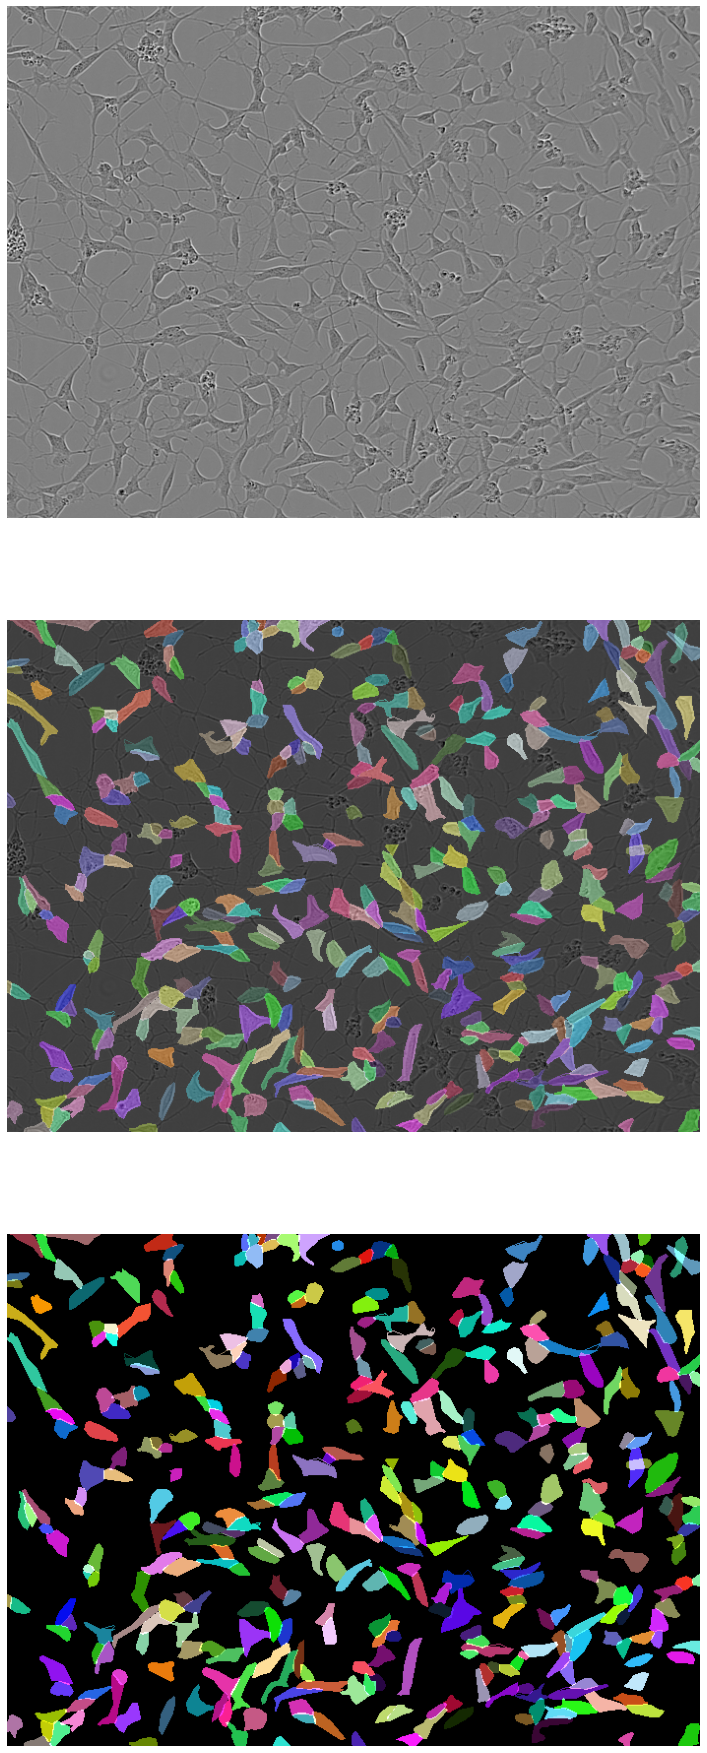

In [81]:
plot_masks(id, colors=True)


In [66]:
# # ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
# def rle_decode(mask_rle, shape):
#     '''
#     mask_rle: run-length as string formated (start length)
#     shape: (height,width) of array to return 
#     Returns numpy array, 1 - mask, 0 - background

#     '''
#     s = mask_rle.split()
#     starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
#     starts -= 1
#     ends = starts + lengths
#     img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
#     for lo, hi in zip(starts, ends):
#         img[lo:hi] = 1
#     return img.reshape(shape)  # Needed to align to RLE direction


# # ref.: https://www.kaggle.com/stainsby/fast-tested-rle
# def rle_encode(img):
#     '''
#     img: numpy array, 1 - mask, 0 - background
#     Returns run length as string formated
#     '''
#     pixels = img.flatten()
#     pixels = np.concatenate([[0], pixels, [0]])
#     runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
#     runs[1::2] -= runs[::2]
#     return ' '.join(str(x) for x in runs)


118145 6 118849 7 119553 8 120257 8 120961 9 121665 10 122369 12 123074 13 123778 14 124482 15 125186 16 125890 17 126594 18 127298 19 128002 20 128706 21 129410 22 130114 23 130818 24 131523 24 132227 25 132931 25 133635 24 134339 24 135043 23 135748 21 136452 19 137157 16 137864 11 138573 4


ValueError: cannot reshape array of size 366080 into shape (520,704,3)

In [144]:
my_string = '11110111000000100'

grouped = [list(g) for k, g in groupby(my_string)]
rle = list(map(lambda x : str(len(x)), grouped))

print('string: ', my_string)
print('encoding: ', rle)
print(' '.join((rle)))


string:  11110111000000100
encoding:  ['4', '1', '3', '6', '1', '2']
4 1 3 6 1 2


In [ ]:
ss_df["predicted"] = rle_encode(np.clip(msk, 0, 1))
ss_df = ss_df[["id", "predicted"]]
ss_df.to_csv("submission.csv", index=False)